In [1]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize faker for Indian context
fake = Faker("en_IN")
np.random.seed(42)

# Number of synthetic records
N = 50000

# Generate features
ages = np.random.randint(21, 60, N)
city_tier = np.random.choice([1, 2, 3], size=N, p=[0.4, 0.35, 0.25])   # Metro/Tier-2/Tier-3
job_type = np.random.choice(["Salaried", "Self-Employed", "Student"], size=N, p=[0.6, 0.3, 0.1])

monthly_income = np.random.lognormal(mean=10, sigma=0.5, size=N).astype(int)
monthly_income = np.clip(monthly_income, 10000, 200000)  # Clamp to 10k–2L

emi_ratio = np.round(np.random.uniform(0, 0.7, N), 2)  # EMI/Income ratio
emi_amount = (monthly_income * emi_ratio).astype(int)

active_loans = np.random.poisson(1, N)  # Avg 1 loan
credit_utilization = np.random.randint(10, 100, N)  # %
upi_txns = np.random.poisson(50, N)  # Monthly UPI transactions

bill_payment_history = np.random.randint(70, 100, N)  # % on-time
bank_balance_var = np.random.randint(5, 50, N)  # variance indicator

# For MSMEs (only ~20% of people are business owners)
is_msme = np.random.choice([0, 1], size=N, p=[0.8, 0.2])
gst_revenue = np.where(is_msme == 1, np.random.randint(50000, 500000, N), 0)
invoice_defaults = np.where(is_msme == 1, np.random.binomial(5, 0.1, N), 0)

# Credit Score Calculation (simplified rule-based)
base_score = 300 + \
             (ages / 60 * 100) + \
             (bill_payment_history / 100 * 200) + \
             ((1 - emi_ratio) * 200) + \
             ((100 - credit_utilization) / 100 * 100)

# Adjustments
base_score -= active_loans * 10
base_score -= np.where(invoice_defaults > 2, 50, 0)
base_score += np.where(is_msme & (gst_revenue > 200000), 50, 0)

credit_score = np.clip(base_score.astype(int), 300, 900)

# Build DataFrame
df = pd.DataFrame({
    "Name": [fake.name() for _ in range(N)],
    "Age": ages,
    "City_Tier": city_tier,
    "Job_Type": job_type,
    "Monthly_Income": monthly_income,
    "EMI_Amount": emi_amount,
    "Active_Loans": active_loans,
    "Credit_Utilization(%)": credit_utilization,
    "UPI_Transactions": upi_txns,
    "Bill_Payment_History(%)": bill_payment_history,
    "Bank_Balance_Variance": bank_balance_var,
    "Is_MSME": is_msme,
    "GST_Revenue": gst_revenue,
    "Invoice_Defaults": invoice_defaults,
    "Credit_Score": credit_score
})

# Save dataset
df.to_csv("synthetic_credit_data.csv", index=False)

print("Dataset created: synthetic_credit_data.csv")
print(df.head(10))


Dataset created: synthetic_credit_data.csv
               Name  Age  City_Tier       Job_Type  Monthly_Income  \
0   Quincy Bhargava   59          2       Salaried           20026   
1   Dayamai Purohit   49          2       Salaried           13443   
2         Urvi Bora   35          2       Salaried           10000   
3       Hemal Garde   28          1       Salaried           19685   
4     Ishanvi Sahni   41          1       Salaried           16918   
5      Daksh Karnik   59          1       Salaried           23017   
6       Girish Kale   39          1       Salaried           15567   
7       Naksh Murty   43          3  Self-Employed           30841   
8  Abhimanyu Chawla   31          1       Salaried           19468   
9    Baljiwan Nadig   31          1       Salaried           23619   

   EMI_Amount  Active_Loans  Credit_Utilization(%)  UPI_Transactions  \
0        2603             2                     49                50   
1        7528             0               

In [3]:
df.head()

,Name,Age,City_Tier,Job_Type,Monthly_Income,EMI_Amount,Active_Loans,Credit_Utilization(%),UPI_Transactions,Bill_Payment_History(%),Bank_Balance_Variance,Is_MSME,GST_Revenue,Invoice_Defaults,Credit_Score
0,Quincy Bhargava,59,2,Salaried,20026,2603,2,49,50,95,32,0,0,0,793
1,Dayamai Purohit,49,2,Salaried,13443,7528,0,35,37,78,39,1,360292,1,740
2,Urvi Bora,35,2,Salaried,10000,600,0,90,51,73,8,0,0,0,702
3,Hemal Garde,28,1,Salaried,19685,3937,2,70,53,81,45,0,0,0,678
4,Ishanvi Sahni,41,1,Salaried,16918,6598,1,94,48,71,26,0,0,0,628


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     50000 non-null  object
 1   Age                      50000 non-null  int64 
 2   City_Tier                50000 non-null  int64 
 3   Job_Type                 50000 non-null  object
 4   Monthly_Income           50000 non-null  int64 
 5   EMI_Amount               50000 non-null  int64 
 6   Active_Loans             50000 non-null  int64 
 7   Credit_Utilization(%)    50000 non-null  int64 
 8   UPI_Transactions         50000 non-null  int64 
 9   Bill_Payment_History(%)  50000 non-null  int64 
 10  Bank_Balance_Variance    50000 non-null  int64 
 11  Is_MSME                  50000 non-null  int64 
 12  GST_Revenue              50000 non-null  int64 
 13  Invoice_Defaults         50000 non-null  int64 
 14  Credit_Score             50000 non-nul

In [5]:
df.drop(['Name'], inplace = True, axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      50000 non-null  int64 
 1   City_Tier                50000 non-null  int64 
 2   Job_Type                 50000 non-null  object
 3   Monthly_Income           50000 non-null  int64 
 4   EMI_Amount               50000 non-null  int64 
 5   Active_Loans             50000 non-null  int64 
 6   Credit_Utilization(%)    50000 non-null  int64 
 7   UPI_Transactions         50000 non-null  int64 
 8   Bill_Payment_History(%)  50000 non-null  int64 
 9   Bank_Balance_Variance    50000 non-null  int64 
 10  Is_MSME                  50000 non-null  int64 
 11  GST_Revenue              50000 non-null  int64 
 12  Invoice_Defaults         50000 non-null  int64 
 13  Credit_Score             50000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 

In [7]:
import seaborn as sns

In [8]:
df['Job_Type'].value_counts()

,count
Job_Type,
Salaried,30038
Self-Employed,15049
Student,4913


In [9]:
df[df.duplicated()]

,Age,City_Tier,Job_Type,Monthly_Income,EMI_Amount,Active_Loans,Credit_Utilization(%),UPI_Transactions,Bill_Payment_History(%),Bank_Balance_Variance,Is_MSME,GST_Revenue,Invoice_Defaults,Credit_Score


In [10]:
df[df.isnull().any(axis = 1)]

,Age,City_Tier,Job_Type,Monthly_Income,EMI_Amount,Active_Loans,Credit_Utilization(%),UPI_Transactions,Bill_Payment_History(%),Bank_Balance_Variance,Is_MSME,GST_Revenue,Invoice_Defaults,Credit_Score


In [11]:
df.sample(5)

,Age,City_Tier,Job_Type,Monthly_Income,EMI_Amount,Active_Loans,Credit_Utilization(%),UPI_Transactions,Bill_Payment_History(%),Bank_Balance_Variance,Is_MSME,GST_Revenue,Invoice_Defaults,Credit_Score
8202,22,3,Student,15047,9479,0,62,54,81,22,0,0,0,610
1219,35,1,Salaried,17792,10675,0,20,60,73,24,1,313456,0,714
7378,56,3,Salaried,32758,12775,0,22,56,82,5,1,355925,0,807
9075,42,2,Self-Employed,21331,5759,0,65,71,83,33,0,0,0,717
32259,21,1,Salaried,16037,6254,0,48,43,70,15,0,0,0,649


In [12]:
X = df.drop(['Credit_Score'], axis = 1)
y = df['Credit_Score']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [
    ('StandardScaler', StandardScaler(), [column for column in df.select_dtypes(exclude="object").columns if column != 'Credit_Score']),
    ("OneHotEncoder", OneHotEncoder(), df.select_dtypes(include = "object").columns)
    ],  remainder = "passthrough"
)

In [16]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train)

<Axes: >

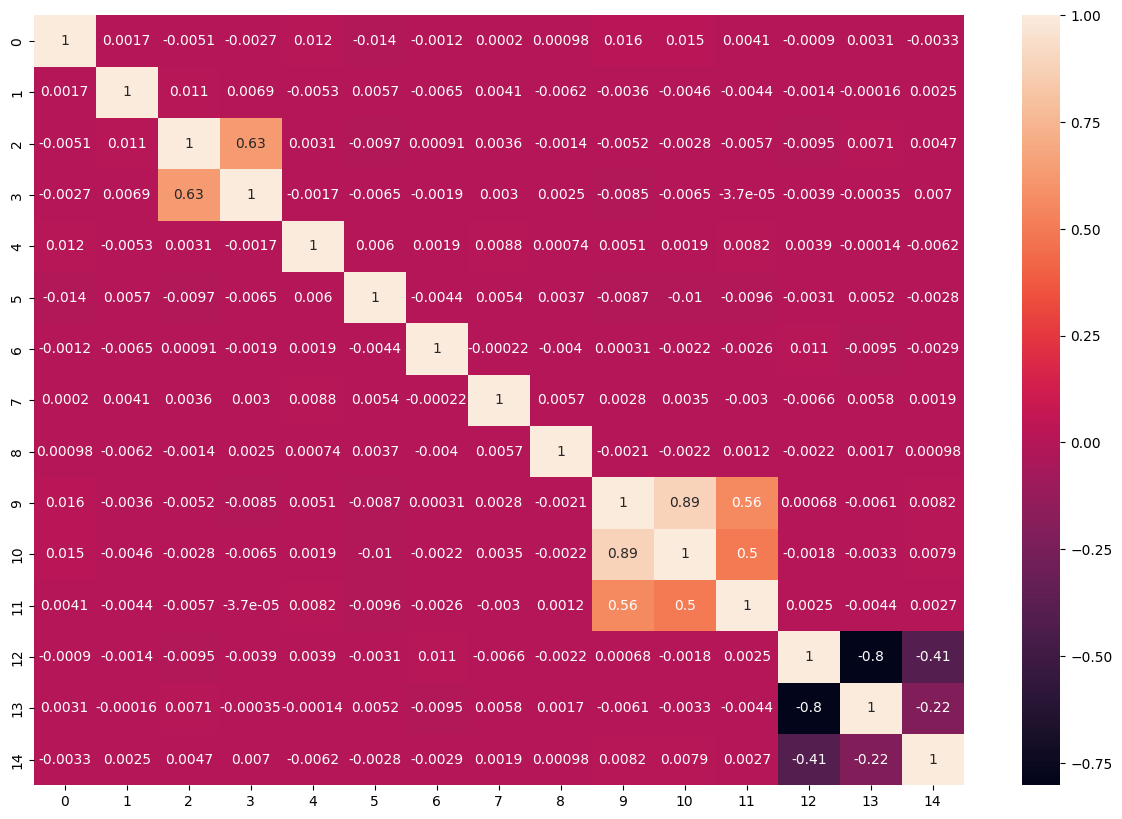

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
sns.heatmap(X_train.corr(), annot = True, xticklabels=X_train.columns, yticklabels=X_train.columns)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate(y_test, y_pred):
  print("R2 Score", r2_score(y_test, y_pred))
  print("MSE", mean_squared_error(y_test, y_pred))
  print("MAE", mean_absolute_error(y_test, y_pred),"\n")

In [21]:
models = {
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'AdaBoost' : AdaBoostRegressor(),
    'Decision Tree' : DecisionTreeRegressor()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name)
  evaluate(y_test, y_pred)

KeyboardInterrupt: 

In [28]:
xgboost_paramas = {
  'learning_rate' : [0.1, 0.01],
  'max_depth' : [5, 8, 12],
  'n_estimators' : [100, 200],
  'colsample_bytree' : [0.5, 0.8, 1]
}

In [29]:
from xgboost import XGBRegressor

In [30]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(XGBRegressor(), xgboost_paramas, cv = 5, verbose = 2, scoring = 'neg_median_absolute_error')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   2.2s
[CV] END colsample_bytree=0.5, learnin

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [5, 8, 12],
                         'n_estimators': [100, 200]},
             scoring='neg_median_absolute_error', verbose=2)

In [31]:
print("Best parameters found: ", grid.best_params_)
print("Best score found: ", grid.best_score_)

Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score found:  -2.25186767578125


In [32]:
model = grid.best_estimator_

In [35]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

R2 Score 0.9961689114570618
MSE 12.808282852172852
MAE 2.609797716140747 



In [36]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(ct, open('ct.pkl', 'wb'))